## 🧹 Laptop Market Data Cleaning and Combination
This notebook combines and cleans scraped laptop data from multiple Tunisian e-commerce websites.

### 📦 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


### 📂 Step 2: Load Datasets

In [2]:
base_url = "C:/Users/HP/Desktop/laptop-price-prediction-tn-main/src/scrapping_beautifulsoup/scraped_data/"

In [3]:
agora_data = pd.read_csv(base_url+'agora_products.csv')
batam_data = pd.read_csv(base_url+'batam_products.csv')
graiet_data = pd.read_csv(base_url+'graiet_products.csv')
mytek_data = pd.read_csv(base_url+'mytek_products.csv')
spacenet_data = pd.read_csv(base_url+'spacenet_products.csv')
tunisianet_data = pd.read_csv(base_url+'tunisianet_products.csv')

In [4]:
new_columns_name = [
    'reference', 'link', 'name', 'brand', 'image_url', 'store', 'screen_size', 'screen_resolution', 'processor',
    'processor_reference', 'ram', 'disk_capacity', 'disk_type', 'gpu', 'os', 'gamer', 'price'
]

agora_data.columns = new_columns_name
batam_data.columns = new_columns_name
graiet_data.columns = new_columns_name
mytek_data.columns = new_columns_name
spacenet_data.columns = new_columns_name
tunisianet_data.columns = new_columns_name

In [5]:
# List of dataframes
dataframes = [agora_data, batam_data, graiet_data, mytek_data, spacenet_data, tunisianet_data]

# Concatenate all dataframes vertically (along rows)
combined_data = pd.concat(dataframes, ignore_index=True)


### 🔍 Step 3: Explore Raw Data

In [6]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reference            4169 non-null   object
 1   link                 4171 non-null   object
 2   name                 4171 non-null   object
 3   brand                3045 non-null   object
 4   image_url            4171 non-null   object
 5   store                4171 non-null   object
 6   screen_size          4145 non-null   object
 7   screen_resolution    1655 non-null   object
 8   processor            4161 non-null   object
 9   processor_reference  3616 non-null   object
 10  ram                  4160 non-null   object
 11  disk_capacity        4137 non-null   object
 12  disk_type            1980 non-null   object
 13  gpu                  4106 non-null   object
 14  os                   4168 non-null   object
 15  gamer                3370 non-null   object
 16  price 

In [7]:
combined_data.describe().T

,count,unique,top,freq
reference,4169,2450,X1502VA-NJ257W,7
link,4171,3055,https://spacenet.tn/pc-portable-asus/80194-pc-...,2
name,4171,2871,Pc Portable Lenovo IdeaPad 1 15IJL7 Intel Cele...,9
brand,3045,277,LOQ 15IRX9,96
image_url,4171,3055,https://spacenet.tn/239010-home_default/pc-por...,2
store,4171,6,SpaceNet,2289
screen_size,4145,30,15.6 Pouces,1961
screen_resolution,1655,27,Full HD,583
processor,4161,66,Intel Core i5,1193
processor_reference,3616,405,"Intel Core i7-13620H (4.9 GH, 24 Mo de mémoire...",107


### 🧼 Step 4: Data Cleaning

#### Clean `brand` Column

In [8]:
# Count missing brand values before cleaning
missing_before = combined_data['brand'].isna().sum()
print(f"NaN values in brand: {missing_before}")

NaN values in brand: 1126


In [9]:
# List of possible brand names
brand_keywords = ['apple', 'asus', 'dell', 'acer' , 'gigabyte', 'hp', 'lenovo', 'msi','samsung','chneider', 'thomson', 'toshiba', 'huawei', 'infinix', 'bmax', 'razer', 'yatagan','aorus']

# Function to fill missing brand values based on the name column
def detect_brand(row):
    current_brand = str(row['brand']).lower().strip()
    name = str(row['name']).lower()
    
    # If the current brand is in the known list, keep it
    if current_brand in brand_keywords:
        return current_brand.capitalize()
    
    # Otherwise, try to detect it from the name
    for brand in brand_keywords:
        if brand in name:
            return brand.capitalize()
    
    # If nothing is detected
    return None

# Apply row-wise
combined_data['brand'] = combined_data.apply(detect_brand, axis=1)

In [10]:
# Count missing brand values after cleaning
missing_after = combined_data['brand'].isna().sum()

In [11]:
# Calculate how many were filled
filled_count = missing_before - missing_after

print(f"✅ {filled_count} missing brand values were detected and filled.")

✅ 1122 missing brand values were detected and filled.


In [12]:
brands = combined_data['brand'].unique().tolist()
print(brands)

['Asus', 'Dell', 'Lenovo', 'Hp', 'Msi', 'Gigabyte', 'Apple', 'Bmax', None, 'Thomson', 'Acer']


In [13]:
combined_data['brand'].value_counts(dropna=False)

brand
Lenovo      1179
Asus         838
Hp           811
Dell         738
Msi          364
Gigabyte      91
Apple         78
Acer          62
Bmax           4
None           4
Thomson        2
Name: count, dtype: int64

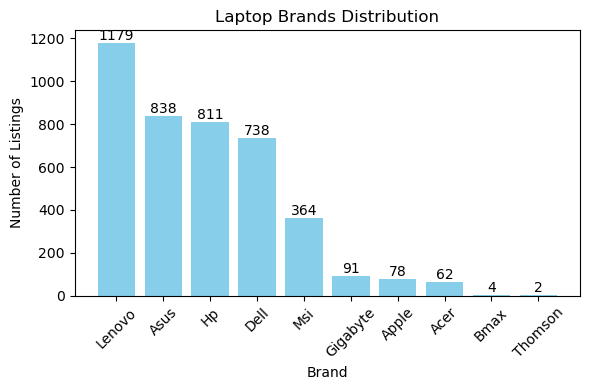

In [14]:
brand_counts = combined_data['brand'].value_counts(dropna=True)

plt.figure(figsize=(6,4))
bars = plt.bar(brand_counts.index, brand_counts.values, color='skyblue')
plt.title('Laptop Brands Distribution')
plt.xlabel('Brand')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Clean `screen_size` Column

In [15]:
nan_count = combined_data['screen_size'].isna().sum()
print(f"NaN values in screen_size: {nan_count}")

NaN values in screen_size: 26


In [16]:
screen_sizes = combined_data['screen_size'].unique().tolist()
print(screen_sizes)

['15.6"', '14"', '17.3"', '16"', "15,6''", "14''", '13.6"', "16''", '13.3"', '15.3"', '15.6 “', '19,5"', nan, '14″ Full HD', '17.3″', '15.6 Pouces', '15.3 Pouces', '16 Pouces', '17.3 Pouces', '14 Pouces', '16.1 Pouces', '13.3 Pouces', '13.4 Pouces', '13 Pouces', '14.1 Pouces', '13  Pouces', '13.6 Pouces', '13.5 Pouces', '14" - 15.6"', '13,6"', '13"']


In [17]:
def clean_screen_size(value):
    if pd.isna(value):
        return np.nan
    
    # Convert to string, replace commas by dots for decimals
    text = str(value).lower().replace(',', '.')
    
    # Use regex to find a float or int number (e.g., 15.6, 14, 13.3)
    match = re.search(r'(\d+(\.\d+)?)', text)
    
    if match:
        return float(match.group(1))
    else:
        return np.nan

# Example usage on your column
combined_data['screen_size'] = combined_data['screen_size'].apply(clean_screen_size)

In [18]:
screen_sizes = combined_data['screen_size'].value_counts(dropna=False)
print(screen_sizes)

screen_size
15.6    2312
14.0    1080
16.0     524
13.3      58
16.1      49
17.3      46
NaN       26
13.6      23
15.3      19
13.0      19
19.5       6
13.5       4
13.4       3
14.1       2
Name: count, dtype: int64


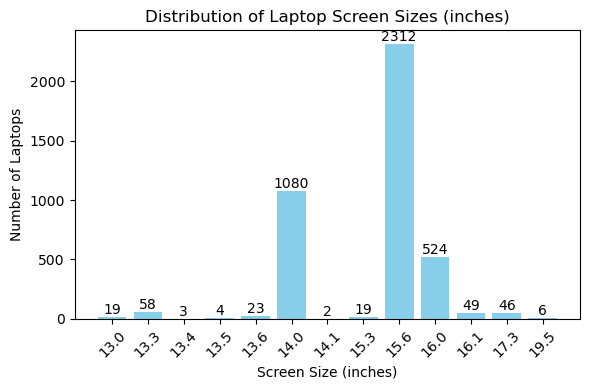

In [19]:
# Assuming combined_data['screen_size_cleaned'] contains your cleaned floats
screen_sizes = combined_data['screen_size'].dropna()

# Count occurrences of each screen size
size_counts = screen_sizes.value_counts().sort_index()

plt.figure(figsize=(6,4))
bars = plt.bar(size_counts.index.astype(str), size_counts.values, color='skyblue')
plt.title('Distribution of Laptop Screen Sizes (inches)')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Clean `screen_resolution` Column

In [20]:
nan_count = combined_data['screen_resolution'].isna().sum()
print(f"NaN values in screen_resolution: {nan_count}")

NaN values in screen_resolution: 2516


In [21]:
combined_data = combined_data.drop(columns=['screen_resolution'])

#### Clean `processor` Column

In [22]:
nan_count = combined_data['processor'].isna().sum()
print(f"NaN values in processor: {nan_count}")

NaN values in processor: 10


In [23]:
processors = combined_data['processor'].unique().tolist()
print(processors)

['Intel Celeron-Dual Core', 'Intel Core i3', 'AMD RYZEN 5', 'AMD RYZEN 7', 'Intel Core i5', 'Intel Core i7', 'Intel Core i9', 'AMD RYZEN 9', 'AMD', 'Intel Celeron-Quad-Core', 'Intel Celeron', 'AMD Athlon', 'AMD RYZEN 3', 'Intel Core Ultra 7', 'AMD Ryzen 5', 'AMD Ryzen 7', 'U7', 'Intel Core Ultra 5', 'Apple M3', 'Apple M4', 'Apple M3 Pro', 'AMD Ryzen 3', 'AMD Ryzen', 'U5', 'Apple M1', 'Apple M2', 'Hélio G99', 'Celeron N100', 'Intel Core i3-12è Gén', 'Intel Core i3 13è Gén', 'Intel Core i3-N305', 'Intel Core i3 12é Gén', 'i3-10110U (2.10 GHz up to 4.10 GHz, 4Mo Mémoire cache, Dual-Core)', nan, 'Intel Core i5 12è Gén', 'Intel Core i5 13é Gén', 'i5 13è Gén', 'Intel Core i5-1135G7 ( jusqu’à 4,2 GHz, 8 Mo)', 'Intel® Core™ i7 11émé génération', 'Intel Core  i7 13è Gén', '_', 'Intel Core i9 13è Gén', 'Intel Core i5-11400H', 'Intel  Core i5 210H', 'Intel Core i7 12è Gén', 'Intel Core7 - 240H', 'Intel Core i7-240H', 'Intel N95', 'Intel Core 5', 'Intel Core 7', 'AMD Ryzen 9', 'AMD Ryzen AI 9', 'I

In [24]:
canonical_map = {
    # Intel Core i3 series
    r'intel.*core.*i3': 'Intel Core i3',
    r'\bi3\b': 'Intel Core i3',

    # Intel Core i5 series
    r'intel.*core.*i5': 'Intel Core i5',
    r'\bi5\b': 'Intel Core i5',

    # Intel Core i7 series
    r'intel.*core.*i7': 'Intel Core i7',
    r'\bcore\s*7\b': 'Intel Core i7',
    r'\bcore7\b': 'Intel Core i7',

    # Intel Core i9 series
    r'intel.*core.*i9': 'Intel Core i9',

    # Intel Core Ultra series (various)
    r'(intel.*core.*ultra.*5|intel.*ultra.*5|u5)': 'Intel Core Ultra 5',
    r'(intel.*core.*ultra.*7|intel.*ultra.*7|u7)': 'Intel Core Ultra 7',
    r'(intel.*core.*ultra.*9|intel.*ultra.*9|u9)': 'Intel Core Ultra 9',

    # Intel Celeron
    r'intel.*celeron.*dual.*core': 'Intel Celeron Dual Core',
    r'intel.*celeron.*quad.*core': 'Intel Celeron Quad Core',
    r'intel.*celeron': 'Intel Celeron',
    r'celeron n100': 'Intel Celeron N100',

    # Intel N95 etc.
    r'intel.*n95': 'Intel N95',

    # AMD Ryzen 3, 5, 7, 9 series (ignore case, handle "Amd" or "AMD")
    r'amd.*ryzen.*3': 'AMD Ryzen 3',
    r'amd.*ryzen.*5': 'AMD Ryzen 5',
    r'amd.*ryzen.*7': 'AMD Ryzen 7',
    r'amd.*ryzen.*9': 'AMD Ryzen 9',
    r'\bamd\b': 'AMD Ryzen',  # vague "Amd" mapped to generic Ryzen

    # AMD Athlon
    r'amd.*athlon': 'AMD Athlon',

    # Apple M series
    r'apple.*m1.*pro': 'Apple M1 Pro',
    r'apple.*m4.*pro': 'Apple M4 Pro',
    r'apple.*m1': 'Apple M1',
    r'apple.*m2': 'Apple M2',
    r'apple.*m3': 'Apple M3',
    r'apple.*m4': 'Apple M4',

    # Snapdragon (general)
    r'snapdragon.*': 'Snapdragon',

    # Helio G series
    r'hélio.*g\d+': 'Helio G99',
}

def clean_processor(text):
    if pd.isna(text):
        return np.nan
    text = str(text).lower().strip()

    # Remove unwanted chars and info
    text = re.sub(r'[_|]', '', text)
    text = re.sub(r'\(.*?\)', '', text)  # remove parenthesis content (non-greedy)
    text = text.strip()

    # Map to canonical names
    for pattern, canonical in canonical_map.items():
        if re.search(pattern, text):
            return canonical
    
    # Catch common shorthand like "u5", "u7", "u9" - treat as NaN or unknown
    if text in ['u5', 'u7', 'u9', '', '_']:
        return np.nan

    # Capitalize properly for unknowns
    return text.title()

# Appliquer la fonction
combined_data['processor'] = combined_data['processor'].apply(clean_processor)

In [25]:
combined_data['processor'].value_counts(dropna=False)

processor
Intel Core i5              1518
Intel Core i7              1176
Intel Core i3               377
AMD Ryzen 7                 215
Intel Core Ultra 7          174
Intel Celeron               148
Intel Core i9               116
AMD Ryzen 5                 107
Intel Core Ultra 5          101
Apple M3                     33
AMD Ryzen 3                  30
AMD Ryzen 9                  29
Intel Core 5                 25
Helio G99                    23
Apple M2                     19
NaN                          14
Intel Core Ultra 9           14
Apple M4                      9
Snapdragon                    9
Intel Celeron Dual Core       8
Apple M4 Pro                  8
AMD Ryzen                     5
Intel N95                     4
Apple M1                      4
Intel Celeron Quad Core       3
Intel Celeron N100            2
Name: count, dtype: int64

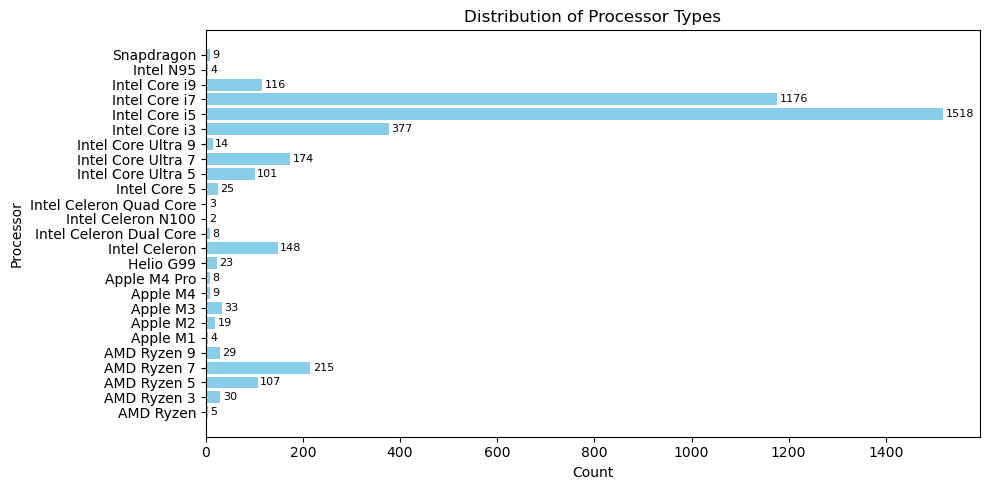

In [26]:
processor_counts = combined_data['processor'].value_counts(dropna=True)
processor_counts = processor_counts.sort_index()

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(processor_counts.index, processor_counts.values, color='skyblue')

plt.xlabel('Count')
plt.ylabel('Processor')
plt.title('Distribution of Processor Types')

# Show count next to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2.0, int(width), va='center', fontsize=8)

plt.tight_layout()
plt.show()

#### Clean `processor_reference` Column

In [27]:
nan_count = combined_data['processor_reference'].isna().sum()
print(f"NaN values in processor_reference: {nan_count}")

NaN values in processor_reference: 555


In [28]:
combined_data = combined_data.drop(columns=['processor_reference'])

#### Clean `ram` Column

In [29]:
nan_count = combined_data['ram'].isna().sum()
print(f"NaN values in ram: {nan_count}")

NaN values in ram: 11


In [30]:
rams = combined_data['ram'].unique().tolist()
print(rams)

['4 Go', '8 Go', '16 Go', '12 Go', '32 Go', '4Go', '18 Go', '4 Mo', '8 G', '4 G', '16 G', nan, '24Go', '32Go', '24 Go', '20 Go', '64 Go', '48 Go', '40Go', '28 Go', '44 Go', '40 Go']


In [31]:
def clean_ram(value):
    if pd.isna(value):
        return np.nan
    # Convert to string and lowercase
    value = str(value).lower()
    
    # Find the first number in the string
    match = re.search(r'(\d+)', value)
    if match:
        return int(match.group(1))
    else:
        return np.nan 

# Apply to the column
combined_data['ram'] = combined_data['ram'].apply(clean_ram).astype('Int64') 

In [32]:
combined_data['ram'].value_counts(dropna=False)

ram
16      1342
8       1121
24       676
32       672
12       132
4         58
64        50
20        39
48        32
40        23
<NA>      11
18         7
28         4
44         4
Name: count, dtype: Int64

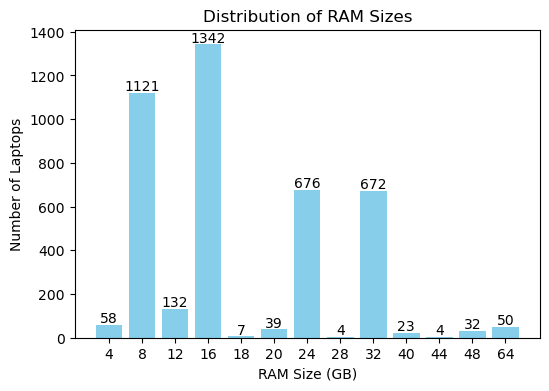

In [33]:
ram_counts = combined_data['ram'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
bars = plt.bar(ram_counts.index.astype(str), ram_counts.values, color='skyblue')

plt.xlabel('RAM Size (GB)')
plt.ylabel('Number of Laptops')
plt.title('Distribution of RAM Sizes')

# Show count above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, str(height), ha='center')

plt.show()

#### Clean `disk_capacity` Column | Split into SSD / HDD

In [34]:
nan_count = combined_data['disk_capacity'].isna().sum()
print(f"NaN values in disk_capacity: {nan_count}")

NaN values in disk_capacity: 34


In [35]:
print(combined_data['disk_capacity'].unique().tolist())

['256 Go SSD', '512 Go SSD', '1 To SSD', '256 Go', '1 To', '250GO SSD', '256GO', '512GO', nan, '64 Go eMMC', '512Go SSD', '512 Go', '2x 512Go SSD', '512Go SSD + 1To SSD', '1 To + 256 Go SSD', '2 To SSD']


In [36]:
def convert_to_gb(value_str):
    """
    Convert a capacity string with unit (e.g., '256 Go', '1 To') to integer GB.
    """
    if pd.isna(value_str):
        return 0
    value_str = value_str.lower().strip()
    
    # Extract number (including decimal) and unit
    match = re.search(r'([\d\.]+)\s*(go|to)', value_str)
    if not match:
        return 0
    
    number = float(match.group(1).replace(',', '.'))  # Replace comma decimal by dot if any
    unit = match.group(2)
    
    if unit == 'to':
        return int(number * 1024)  # Convert TB to GB
    else:
        return int(number)  # GB as is

def split_disk_capacity(row):
    val = row['disk_capacity']
    if pd.isna(val):
        return pd.Series([0, 0])

    val = val.lower().replace(' ', '')  # remove spaces for easier parsing
    
    # If '+' present, split components
    if '+' in val:
        parts = val.split('+')
        ssd = 0
        hdd = 0
        for part in parts:
            if 'ssd' in part:
                ssd = convert_to_gb(part)
            else:
                hdd = convert_to_gb(part)
        return pd.Series([ssd, hdd])
    
    # If 'ssd' present in val, SSD capacity, HDD=0
    elif 'ssd' in val:
        ssd = convert_to_gb(val)
        return pd.Series([ssd, 0])
    
    # Otherwise, treat as HDD, SSD=0
    else:
        hdd = convert_to_gb(val)
        return pd.Series([0, hdd])

# Apply function to dataframe
combined_data[['SSD', 'HDD']] = combined_data.apply(split_disk_capacity, axis=1)

In [37]:
print(combined_data[['disk_capacity', 'SSD', 'HDD']].tail(10))

     disk_capacity   SSD  HDD
4161    512 Go SSD   512    0
4162      1 To SSD  1024    0
4163    512 Go SSD   512    0
4164    512 Go SSD   512    0
4165      1 To SSD  1024    0
4166    512 Go SSD   512    0
4167    512 Go SSD   512    0
4168      1 To SSD  1024    0
4169      1 To SSD  1024    0
4170      1 To SSD  1024    0


In [38]:
combined_data = combined_data.drop(columns=['disk_capacity'])

In [39]:
combined_data['SSD'].value_counts(dropna=False)

SSD
512     3294
1024     373
256      333
0        166
2048       4
250        1
Name: count, dtype: int64

In [40]:
combined_data['HDD'].value_counts(dropna=False)

HDD
0       4030
512       78
256       37
1024      20
64         6
Name: count, dtype: int64

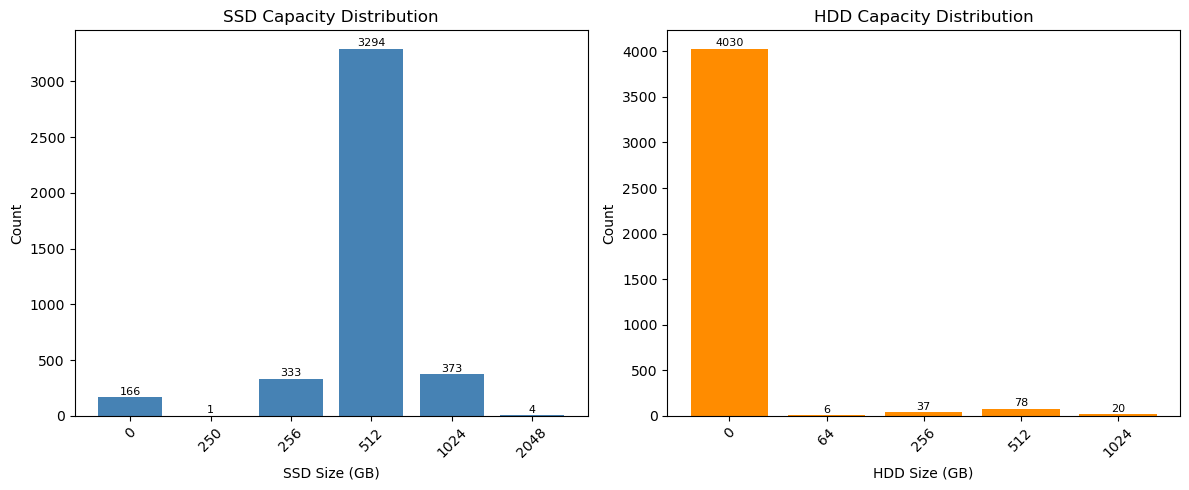

In [41]:
# Group by unique capacities and count occurrences
ssd_counts = combined_data['SSD'].value_counts().sort_index()
hdd_counts = combined_data['HDD'].value_counts().sort_index()

# Create subplots
plt.figure(figsize=(12, 5))

# SSD Plot
plt.subplot(1, 2, 1)
bars1 = plt.bar(ssd_counts.index.astype(str), ssd_counts.values, color='steelblue')
plt.title("SSD Capacity Distribution")
plt.xlabel("SSD Size (GB)")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Add count labels above bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, int(yval), ha='center', va='bottom', fontsize=8)

# HDD Plot
plt.subplot(1, 2, 2)
bars2 = plt.bar(hdd_counts.index.astype(str), hdd_counts.values, color='darkorange')
plt.title("HDD Capacity Distribution")
plt.xlabel("HDD Size (GB)")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Add count labels above bars
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, int(yval), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### Clean `disk_type` Column

In [42]:
nan_count = combined_data['disk_type'].isna().sum()
print(f"NaN values in disk_type: {nan_count}")

NaN values in disk_type: 2191


In [43]:
combined_data = combined_data.drop(columns=['disk_type'])

#### Clean `gpu` Column

In [44]:
nan_count = combined_data['gpu'].isna().sum()
print(f"NaN values in gpu: {nan_count}")

NaN values in gpu: 65


In [45]:
print(combined_data['gpu'].unique().tolist())

['Graphique Intégrée', 'AMD Radeon', 'Intel UHD Intégrée', 'Nvidia GeForce', 'Intel Iris Xe', nan, 'Intel® Graphics', 'Intel® HD Graphics', 'Intel HD Graphics', 'AMD Radeon ™ Intégrée', 'Intel UHD Graphics', 'NVIDIA GeForce GTX 1660', 'Intel® Iris® X', 'NVIDIA GeForce\xa0MX350', 'NVIDIA GeForce MX450', 'GeForce MX570A', 'NVIDIA GeForce MX550', 'GeForce RTX 4070', 'GeForce RTX 2050', 'Intel UMA Graphics', 'NVIDIA GeForce RTX 3050', 'GeForce RTX4050', 'GeForce RTX 4060', 'Intel Arc', 'Nvidia', 'Intel UHD', 'Intel HD', 'AMD Radeon 610M', 'NVIDIA GeForce MX350, 2Go de mémoire dédiée', 'Nvidia GeForce MX570 (2 Go DDR6 dédiés)', 'NVIDIA GeForce MX330, 2 Go de mémoire dédiée', 'Nvidia GeForce RTX 2050, 4 Go De Mémoire Dédiée', 'Nvidia GeForce RTX 2050 (4 Go de mémoire dédiée GDDR6 )', 'Nvidea GeForce RTX 3050, 4 Go De Mémoire Dédiée GDDR6', 'Intel Graphics', 'Nvidia GeForce RTX 3050,6 Go de mémoire dédiée GDDR6', 'Nvidia GeForce RTX 3050, 6 Go De Mémoire Dédiée', 'NVIDIA GeForce MX 550  2Go D

In [46]:
# Define mapping with regex keys and cleaned brand/type values
gpu_map = {
    r'graphique intégrée': 'Integrated Graphics',
    r'amd.*radeon': 'AMD',
    r'intel.*(iris|uhd|hd|graphics|arc|uma)': 'Intel',
    r'(nvidia|nvidea).*geforce': 'Nvidia GeForce',
    r'geforce.*(gtx|rtx|mx|)\s?\d+': 'Nvidia GeForce',  # extra safeguard for rtx 2050, 3050, etc.
    r'geforce.*': 'Nvidia GeForce',
    r'nvidia': 'Nvidia GeForce',
    r'qualcomm.*adreno': 'Qualcomm Adreno',
    r'apple.*m\d+': 'Apple GPU',
}

def clean_gpu(text):
    if pd.isna(text):
        return np.nan
    text = text.lower()
    text = re.sub(r'[\xa0®™]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.replace(',', '').replace('-', ' ')
    
    for pattern, canonical in gpu_map.items():
        if re.search(pattern, text):
            return canonical

    return text.capitalize()

# Apply to your dataset
combined_data['gpu'] = combined_data['gpu'].apply(clean_gpu)

In [47]:
combined_data['gpu'].value_counts(dropna=False)

gpu
Nvidia GeForce         1588
Intel                  1339
Integrated Graphics     945
AMD                     216
NaN                      65
Apple GPU                12
Qualcomm Adreno           6
Name: count, dtype: int64

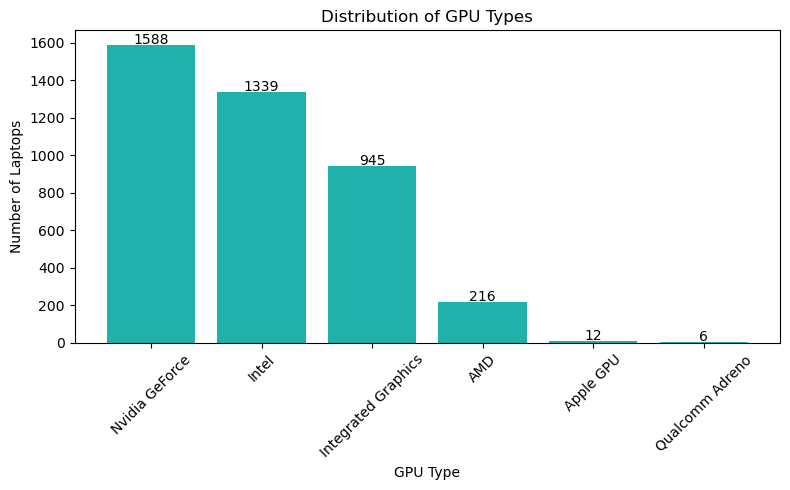

In [48]:
gpu_counts = combined_data['gpu'].value_counts(dropna=True)

plt.figure(figsize=(8, 5))
bars = plt.bar(gpu_counts.index, gpu_counts.values, color='lightseagreen')
plt.xticks(rotation=45)
plt.xlabel('GPU Type')
plt.ylabel('Number of Laptops')
plt.title('Distribution of GPU Types')

# Show counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center')

plt.tight_layout()
plt.show()

#### Clean `os` Column

In [49]:
nan_count = combined_data['os'].isna().sum()
print(f"NaN values in os: {nan_count}")

NaN values in os: 3


In [50]:
print(combined_data['os'].unique().tolist())

['FreeDos', 'Windows', 'Windows 11', 'windows 11 famille', 'Ubuntu', 'Android', 'Windows 11 Famille', 'Ubunto', 'Windows 10', 'MacOS', 'Android 14', nan, 'Windows 11 Pro', 'Free Dos', 'Linux', 'Mac Os', 'Windows 10 Pro', 'Windows 11 Home', 'macOS Big Sur', 'Apple macOS Monterey', 'macOS Sequoia']


In [51]:
os_map = {
    r'free\s?dos': 'FreeDos',
    r'windows.*': 'Windows',
    r'ubuntu|ubunto': 'Ubuntu',
    r'android.*': 'Android',
    r'macos|mac os|apple macos|macos big sur|macos monterey|macos sequoia': 'macOS',
    r'linux': 'Linux',
}

def clean_os(os_value):
    if pd.isna(os_value):
        return np.nan
    os_value = str(os_value).lower().strip()
    
    for pattern, clean_name in os_map.items():
        if re.search(pattern, os_value):
            return clean_name
    return os_value.capitalize()  

combined_data['os'] = combined_data['os'].apply(clean_os)

In [52]:
print(combined_data['os'].value_counts(dropna=False))


os
Windows    2231
FreeDos    1566
Ubuntu      230
macOS        78
Linux        53
Android      10
NaN           3
Name: count, dtype: int64


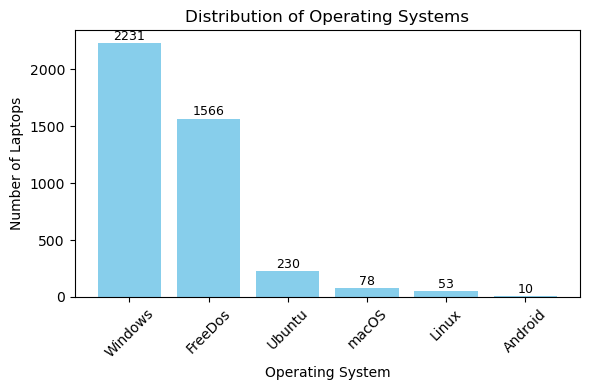

In [53]:
# Get counts
os_counts = combined_data['os'].value_counts(dropna=True)

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(os_counts.index, os_counts.values, color='skyblue')
plt.title("Distribution of Operating Systems")
plt.xlabel("Operating System")
plt.ylabel("Number of Laptops")
plt.xticks(rotation=45)

# Show count above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, int(yval), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#### Clean `gamer` Column

In [54]:
nan_count = combined_data['gamer'].isna().sum()
print(f"NaN values in gamer: {nan_count}")

NaN values in gamer: 801


In [55]:
print(combined_data['gamer'].unique().tolist())

['Non', 'Oui', nan, 'oui']


In [56]:
# Standardize 'gamer' column values
combined_data['gamer'] = combined_data['gamer'].str.strip().str.capitalize()

# Check result
print(combined_data['gamer'].value_counts(dropna=False))

gamer
Non    2318
Oui    1052
NaN     801
Name: count, dtype: int64


In [57]:
# For rows where 'gamer' is NaN, check if 'name' contains 'gamer' (case-insensitive)
mask_nan = combined_data['gamer'].isna()

combined_data.loc[mask_nan, 'gamer'] = combined_data.loc[mask_nan, 'name'].str.contains('gamer', case=False, na=False).map({True: 'Oui', False: 'Non'})

In [58]:
combined_data['gamer'] = combined_data['gamer'].map({'Non': 0, 'Oui': 1}).astype(int)

In [59]:
print(combined_data['gamer'].value_counts(dropna=False))

gamer
0    2931
1    1240
Name: count, dtype: int64


#### Clean `price` Column

In [60]:
nan_count = combined_data['price'].isna().sum()
print(f"NaN values in price: {nan_count}")

NaN values in price: 0


In [61]:
combined_data['price']

0         719,000 TND
1       1 049,000 TND
2       1 169,000 TND
3       1 189,000 TND
4       1 189,000 TND
            ...      
4166    10 399,000 DT
4167    10 399,000 DT
4168    13 489,000 DT
4169    13 679,000 DT
4170    13 899,000 DT
Name: price, Length: 4171, dtype: object

In [62]:
def clean_price(price_str):
    if pd.isna(price_str):
        return None
    price_str = re.sub(r'[^\d,\.]', '', price_str.replace('\u202f', '').replace(' ', ''))
    price_str = price_str.replace(',', '.')
    
    return float(price_str)


combined_data['price'] = combined_data['price'].apply(clean_price)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


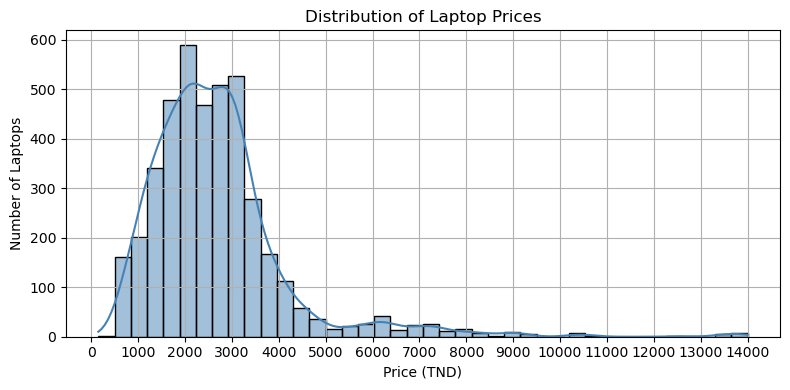

In [63]:
plt.figure(figsize=(8, 4))
sns.histplot(combined_data['price'], bins=40, kde=True, color='steelblue')

max_price = int(combined_data['price'].max())
plt.xticks(np.arange(0, max_price + 1000, 1000))

plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (TND)')
plt.ylabel('Number of Laptops')
plt.grid(True)
plt.tight_layout()
plt.show()

### 🗑️ Step 5: Remove Duplicates and rows with NaN values

In [64]:
# Remove duplicate rows
combined_data = combined_data.drop_duplicates(subset=['brand', 'screen_size', 'processor', 'ram', 'SSD','HDD', 'gpu', 'os', 'gamer', 'price'])

In [65]:
# Drop rows with any NaN values in the entire dataframe
combined_data = combined_data.dropna()

In [66]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2429 entries, 0 to 4163
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reference    2429 non-null   object 
 1   link         2429 non-null   object 
 2   name         2429 non-null   object 
 3   brand        2429 non-null   object 
 4   image_url    2429 non-null   object 
 5   store        2429 non-null   object 
 6   screen_size  2429 non-null   float64
 7   processor    2429 non-null   object 
 8   ram          2429 non-null   Int64  
 9   gpu          2429 non-null   object 
 10  os           2429 non-null   object 
 11  gamer        2429 non-null   int32  
 12  price        2429 non-null   float64
 13  SSD          2429 non-null   int64  
 14  HDD          2429 non-null   int64  
dtypes: Int64(1), float64(2), int32(1), int64(2), object(9)
memory usage: 296.5+ KB


In [67]:
combined_data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,2429.0,15.120255,0.857682,13.0,14.0,15.6,15.6,17.3
ram,2429.0,18.601894,10.29235,4.0,8.0,16.0,24.0,64.0
gamer,2429.0,0.292713,0.455102,0.0,0.0,0.0,1.0,1.0
price,2429.0,2640.51832,1445.395066,629.0,1719.0,2449.0,3145.0,13999.0
SSD,2429.0,514.421573,209.549545,0.0,512.0,512.0,512.0,2048.0
HDD,2429.0,20.340881,109.184769,0.0,0.0,0.0,0.0,1024.0


In [68]:
combined_data.head()

,reference,link,name,brand,image_url,store,screen_size,processor,ram,gpu,os,gamer,price,SSD,HDD
0,X515KA-EJ008,https://agora.tn/fr/pc-portable/16616-pc-porta...,PC PORTABLE ASUS X515KA CELERON N4500U 4GO 256...,Asus,https://agora.tn/fr/46133-home_default/pc-port...,agora,15.6,Intel Celeron Dual Core,4,Integrated Graphics,FreeDos,0,719.0,256,0
1,X1504VA-NJ520W,https://agora.tn/fr/pc-portable/15389-pc-porta...,PC PORTABLE ASUS VIVOBOOK 15 X1504VA I3-1315U ...,Asus,https://agora.tn/fr/43259-home_default/pc-port...,agora,15.6,Intel Core i3,4,Integrated Graphics,Windows,0,1049.0,256,0
2,INS-3535-R5,https://agora.tn/fr/pc-portable/16867-pc-porta...,PC PORTABLE DELL INSPIRON 3535 AMD RAYZEN 5 8G...,Dell,https://agora.tn/fr/46775-home_default/pc-port...,agora,15.6,AMD Ryzen 5,8,AMD,FreeDos,0,1169.0,512,0
3,X1504VA-NJ814W,https://agora.tn/fr/pc-portable/17170-pc-porta...,PC PORTABLE ASUS VIVOBOOK 15 I3-1315U 8GO 512G...,Asus,https://agora.tn/fr/48086-home_default/pc-port...,agora,15.6,Intel Core i3,8,Integrated Graphics,Windows,0,1189.0,512,0
5,82VG00NXFG,https://agora.tn/fr/pc-portable/17267-pc-porta...,PC PORTABLE LENOVO IDEAPAD 115AMN7 AMD RZN 5 1...,Lenovo,https://agora.tn/fr/48300-home_default/pc-port...,agora,15.6,AMD Ryzen 5,16,Integrated Graphics,Windows,0,1319.0,512,0


### 💾 Step 6: Save Cleaned Data

In [69]:
new_order = [
    'reference', 'link', 'name', 'brand', 'image_url', 'store', 'screen_size', 
    'processor', 'ram','SSD','HDD' , 'gpu', 'os', 'gamer', 'price'
]

In [70]:
combined_data = combined_data[new_order]

In [71]:
# Save to CSV
combined_data.to_csv("tunisia_laptop_prices_2025.csv", index=False, encoding='utf-8-sig')

print("Data saved to tunisia_laptop_prices_2025.csv")

Data saved to tunisia_laptop_prices_2025.csv
